In [1]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
spark = pyspark.sql.SparkSession \
    .builder \
    .config("deploy-mode", "cluster") \
    .appName("Analysis") \
    .master("local[2]") \
    .enableHiveSupport() \
    .getOrCreate()

In [4]:
df_1 = spark.sql("SELECT * FROM projekt.yfinance_aggregates_financial").toPandas()
df_2 = spark.sql("SELECT * FROM projekt.yfinance_aggregates_rss").toPandas()

In [5]:
df_1.head()

,Company,Date,Open,Close,Low,High,CloseOpenDifference,HighMinDifference
0,2222.SR,2024-01-09,33.450001,33.599998,33.349998,33.650002,0.149998,0.300003
1,2222.SR,2024-01-08,33.250000,33.400002,33.200001,33.650002,0.150002,0.450001
2,GOOGL,2024-01-09,138.500000,140.579895,138.149994,140.625000,2.079895,2.475006
3,GOOGL,2024-01-08,136.289993,138.687607,136.259995,138.946793,2.397614,2.686798
4,AMZN,2024-01-08,146.740005,149.009903,146.149994,149.399994,2.269897,3.250000


In [6]:
df_2.head()

,date,company,mean_sentiment,mention_count
0,2024-01-09,GOOGL,0.163244,60
1,2024-01-08,GOOGL,0.217769,37
2,2024-01-08,MSFT,0.136333,25
3,2024-01-09,LLY,0.233333,2
4,2024-01-09,AAPL,0.167539,90


In [4]:
df_2 = df_2.rename(columns={'date': 'Date', 'company': 'Company'})

df_2 = df_2.set_index(['Date', 'Company'])
df_1 = df_1.set_index(['Date', 'Company'])

In [5]:
df = df_1.join(df_2, on=['Date', 'Company'], how='inner').reset_index()
df['Date'] = df['Date'].astype('str')
df.head()

,Date,Company,Open,Close,Low,High,CloseOpenDifference,HighMinDifference,mean_sentiment,mention_count
0,2024-01-09,GOOGL,138.500000,140.579895,138.149994,140.625000,2.079895,2.475006,0.163244,60
1,2024-01-08,GOOGL,136.289993,138.687607,136.259995,138.946793,2.397614,2.686798,0.217769,37
2,2024-01-08,AMZN,146.740005,149.009903,146.149994,149.399994,2.269897,3.250000,0.214700,25
3,2024-01-09,MSFT,372.010010,374.209991,371.190002,374.510010,2.199982,3.320007,0.119973,41
4,2024-01-09,META,356.399994,358.510010,355.359985,359.739990,2.110016,4.380005,0.104808,60


# O jakich firmach mówiono najwięcej dzisiejszego dnia?

[Text(0.5, 1.0, 'Company mentioned in 2024-01-09')]

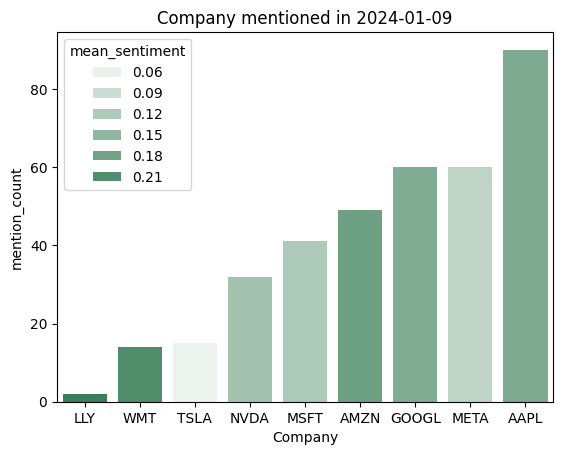

In [6]:
sns.barplot(data=df[df['Date'] == '2024-01-09'].sort_values('mention_count'), x='Company', y='mention_count', hue='mean_sentiment', palette=sns.light_palette("seagreen", as_cmap=True)) \
    .set(title='Company mentioned in 2024-01-09')


# Korelacja pomiędzy statystykami finansowymi i informacjami z mediów

[Text(0, 0.5, 'high - low price difference')]

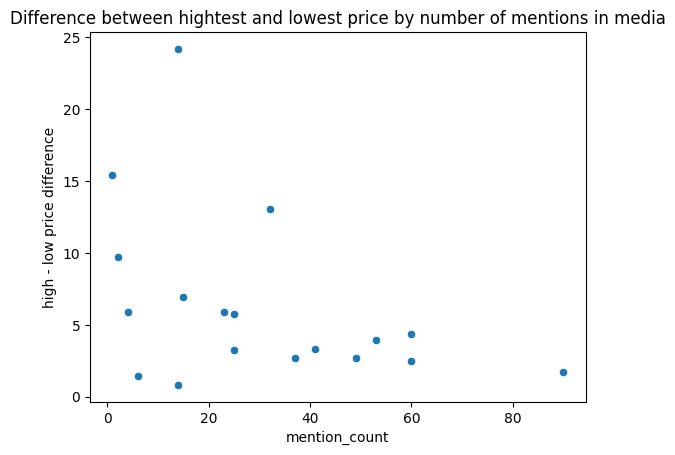

In [7]:
g = sns.scatterplot(data=df, x='mention_count', y='HighMinDifference') 
g.set(title='Difference between hightest and lowest price by number of mentions in media')
g.set(ylabel='high - low price difference')

[Text(0, 0.5, 'close - open price difference')]

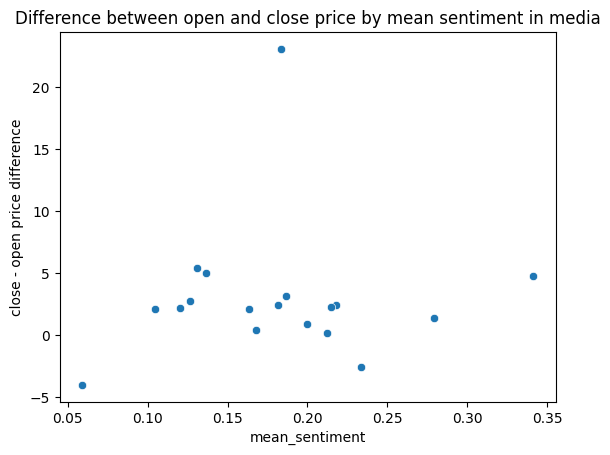

In [8]:
g = sns.scatterplot(data=df, x='mean_sentiment', y='CloseOpenDifference') 
g.set(title='Difference between open and close price by mean sentiment in media') 
g.set(ylabel='close - open price difference')

# Akcje której firmy cechują się największą stabilnością?

[Text(0, 0.5, 'Close - open difference')]

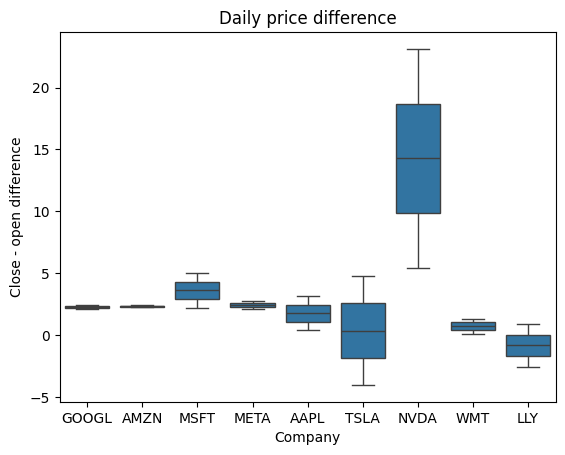

In [9]:
g = sns.boxplot(data=df, x='Company', y='CloseOpenDifference')
g.set(title='Daily price difference') 
g.set(ylabel='Close - open difference')